In [3]:
import pandas as pd
df = pd.read_csv('/Users/diyawang/Documents/GitHub/2017.M3.TQF-ML/files/DataSet1/bank.csv', sep=';')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


# Select feature 'age', 'duration'

In [4]:
# select feature 'age', 'duration'

import numpy as np
y = df.iloc[:, 16].values
y = np.where(y == 'yes', 1, 0)
X = df.iloc[:, [0, 11]].values

In [5]:
# devide training/test sets, 30 percent test data and 70 percent training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [6]:
# normalize

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
# define plot_decision_regions

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## logistic regress

Misclassified samples: 150
Accuracy: 0.89


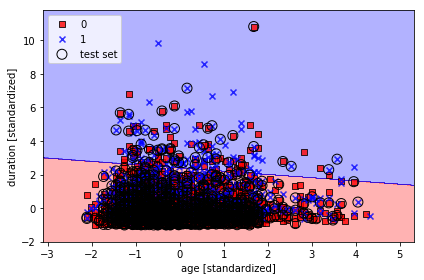

In [8]:
# logistic regress

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

# check the accuracy

from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot the outcome

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## SVM

Misclassified samples: 156
Accuracy: 0.89


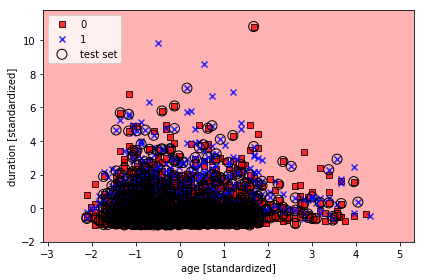

In [9]:
# SVM

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

# check the accuracy

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot the outcome

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## Solving non-linear problems using a kernel SVM

Misclassified samples: 151
Accuracy: 0.89


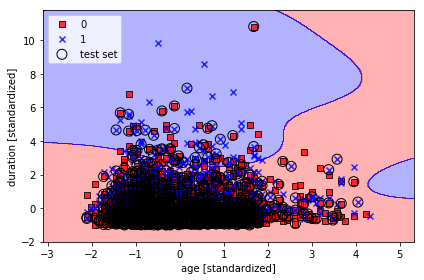

In [11]:
# kernel SVM

from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

# check the accuracy

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot the outcome
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## K-nearest neighbors

Misclassified samples: 178
Accuracy: 0.87


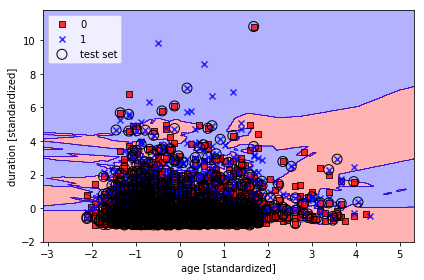

In [12]:
# knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

# check the accuracy

y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot the outcome

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(3164, 4521))

plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

# Select feature 'duration', 'previous'

In [75]:
# Select feature 'duration', 'previous'

import numpy as np
y = df.iloc[:, 16].values
y = np.where(y == 'yes', 1, 0)
X = df.iloc[:, [11, 14]].values

In [68]:
# devide training/test sets, 30 percent test data and 70 percent training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [69]:
# normalize

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [70]:
# define plot_decision_regions

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## logistic regress

Misclassified samples: 149
Accuracy: 0.89


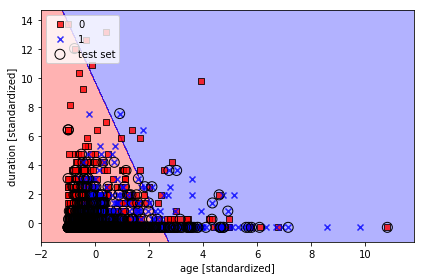

In [71]:
# logistic regress

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

# check the accuracy

from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot the outcome

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## SVM

Misclassified samples: 156
Accuracy: 0.89


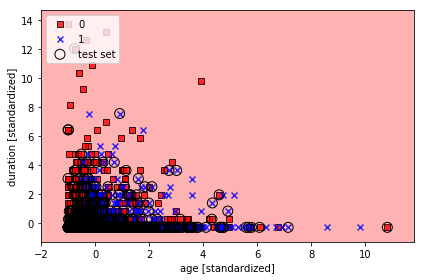

In [72]:
# SVM

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

# check the accuracy

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot the outcome

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## Solving non-linear problems using a kernel SVM

Misclassified samples: 152
Accuracy: 0.89


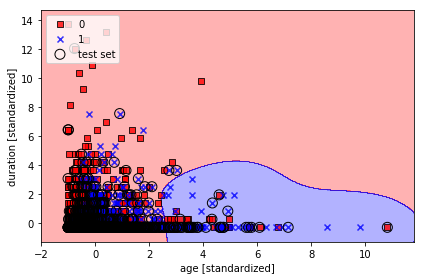

In [73]:
# kernel SVM

from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

# check the accuracy

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot the outcome
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(3164, 4521))
plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

## K-nearest neighbors

Misclassified samples: 185
Accuracy: 0.86


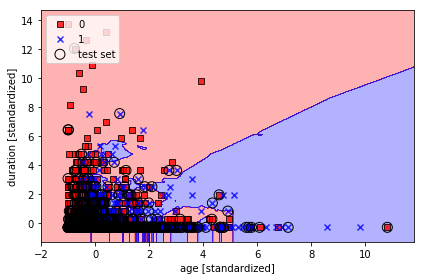

In [74]:
# knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)

# check the accuracy

y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot the outcome

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(3164, 4521))

plt.xlabel('age [standardized]')
plt.ylabel('duration [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()